In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('player_rankings_2024.csv')
data.shape

(1262, 10)

In [3]:
data.isnull().sum()

,0
#,631
Player,0
Team,631
Matches,631
Batting,631
Bowling,631
Fielding,631
Other,631
MOM #,631
Total,631


In [4]:
data.dropna(inplace=True, ignore_index=True)

In [5]:
data.isnull().sum()

,0
#,0
Player,0
Team,0
Matches,0
Batting,0
Bowling,0
Fielding,0
Other,0
MOM #,0
Total,0


In [6]:
data.shape

(631, 10)

In [7]:
data.head()

,#,Player,Team,Matches,Batting,Bowling,Fielding,Other,MOM #,Total
0,1.0,Sam Sabharwal,Windsor Tigers CC,16.0,2213.0,380.0,130.0,250.0,5.0,2973.0
1,2.0,Imran Khan,Chatham CC,15.0,1938.0,700.0,80.0,200.0,4.0,2918.0
2,3.0,Rama Tarun Ganne,Windsor Royals CC,19.0,2277.0,0.0,260.0,250.0,5.0,2787.0
3,4.0,Sahil Sharma,Windsor Royals CC,19.0,1900.0,540.0,100.0,150.0,3.0,2690.0
4,5.0,Karamjit Sohal,WEUnited CC,17.0,1295.0,990.0,100.0,200.0,4.0,2585.0


In [8]:
columns = ["Batting", "Bowling", "Fielding"]

for col in columns:
    print(f"{col}:")
    print(f"  Min: {data[col].min()}")
    print(f"  Median: {data[col].median()}")
    print(f"  Max: {data[col].max()}\n")

Batting:
  Min: -23.0
  Median: 64.0
  Max: 2277.0

Bowling:
  Min: -90.0
  Median: 20.0
  Max: 1030.0

Fielding:
  Min: 0.0
  Median: 20.0
  Max: 350.0



In [9]:
# Calculate the number of rows above and below median

# Calculate for Batting
batting_below_median = data[data["Batting"] <= 64].shape[0]
batting_above_median = data[data["Batting"] > 64].shape[0]

# Calculate for Bowling
bowling_below_median = data[data["Bowling"] <= 20].shape[0]
bowling_above_median = data[data["Bowling"] > 20].shape[0]

# Calculate for Fielding
fielding_below_median = data[data["Fielding"] <= 20].shape[0]
fielding_above_median = data[data["Fielding"] > 20].shape[0]

# Print Results
print("Batting: Below Median:", batting_below_median, "Above Median:", batting_above_median)
print("Bowling: Below Median:", bowling_below_median, "Above Median:", bowling_above_median)
print("Fielding: Below Median:", fielding_below_median, "Above Median:", fielding_above_median)

Batting: Below Median: 316 Above Median: 315
Bowling: Below Median: 338 Above Median: 293
Fielding: Below Median: 340 Above Median: 291


In [10]:
# Define bins and labels for Batting (6 levels)
batting_bins = [-float('inf'), -23, 64, 500, 1000, 1600, 2277]
batting_labels = [1, 2, 3, 4, 5, 6]
data["Batting_Level"] = pd.cut(data["Batting"], bins=batting_bins, labels=batting_labels)

# Define bins and labels for Bowling (6 levels)
bowling_bins = [-float('inf'), -90, 20, 200, 500, 800, 1030]
bowling_labels = [1, 2, 3, 4, 5, 6]
data["Bowling_Level"] = pd.cut(data["Bowling"], bins=bowling_bins, labels=bowling_labels)

# Define bins and labels for Fielding (6 levels)
fielding_bins = [-float('inf'), 0, 20, 60, 120, 200, 350]
fielding_labels = [1, 2, 3, 4, 5, 6]
data["Fielding_Level"] = pd.cut(data["Fielding"], bins=fielding_bins, labels=fielding_labels)

# Save the final dataframe to a CSV file
csv_filename = "final_cricket_levels.csv"
data.to_csv(csv_filename, index=False)

# Print confirmation message
print(f"Final CSV file saved as: {csv_filename}")

Final CSV file saved as: final_cricket_levels.csv


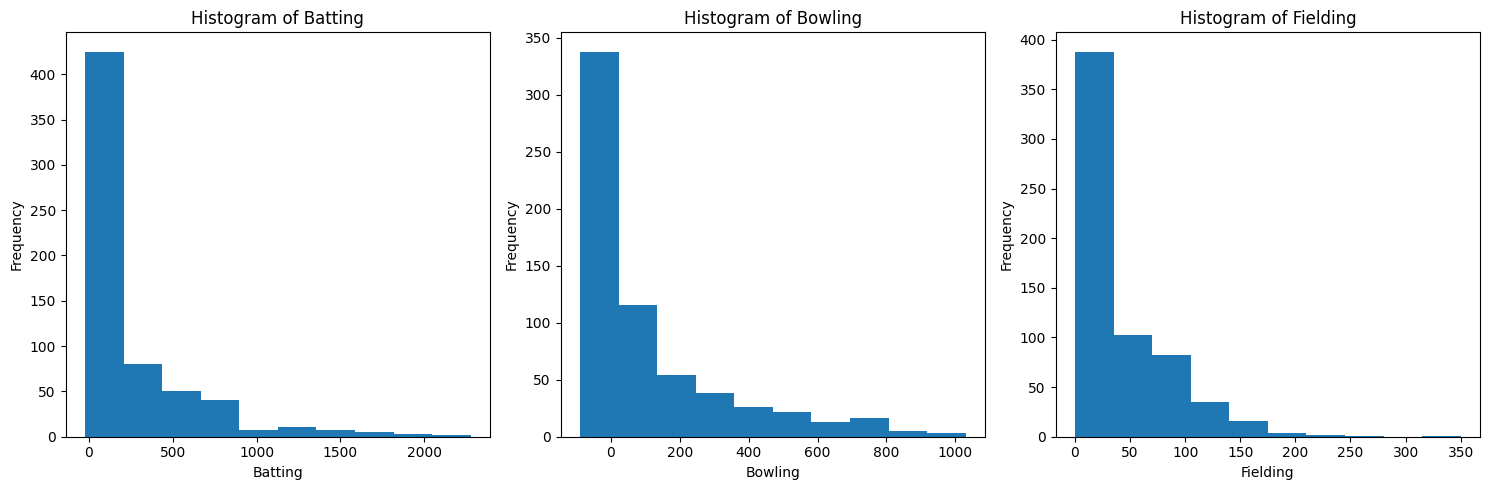

In [11]:
import matplotlib.pyplot as plt
# Assuming data has columns 'Batting', 'Bowling', 'Fielding'
categories = ['Batting', 'Bowling', 'Fielding']

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Loop to create histograms for each category
for i, category in enumerate(categories):
    axes[i].hist(data[category], bins=10)  # Adjust bins as needed
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {category}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [12]:
# List of categories and their corresponding level columns
categories = ['Batting', 'Bowling', 'Fielding']
level_columns = ['Batting_Level', 'Bowling_Level', 'Fielding_Level']

# Create empty dictionaries to store the results for each category
batting_stats = data.groupby('Batting_Level')['Batting'].agg(['min', 'median', 'max'])
bowling_stats = data.groupby('Bowling_Level')['Bowling'].agg(['min', 'median', 'max'])
fielding_stats = data.groupby('Fielding_Level')['Fielding'].agg(['min', 'median', 'max'])

<ipython-input-12-0ecdf25a0908>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batting_stats = data.groupby('Batting_Level')['Batting'].agg(['min', 'median', 'max'])
<ipython-input-12-0ecdf25a0908>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bowling_stats = data.groupby('Bowling_Level')['Bowling'].agg(['min', 'median', 'max'])
<ipython-input-12-0ecdf25a0908>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fieldin

In [13]:
# Print the resulting DataFrames
print("Batting Stats by Level:")
batting_stats

Batting Stats by Level:


,min,median,max
Batting_Level,,,
1,-23.0,-23.0,-23.0
2,-20.0,2.0,64.0
3,65.0,191.0,500.0
4,507.0,701.0,984.0
5,1033.0,1260.0,1593.0
6,1614.0,1880.0,2277.0


In [14]:
print("Bowling Stats by Level:")
bowling_stats

Bowling Stats by Level:


,min,median,max
Bowling_Level,,,
1,-90.0,-90.0,-90.0
2,-60.0,0.0,20.0
3,30.0,90.0,200.0
4,210.0,325.0,500.0
5,510.0,645.0,800.0
6,810.0,905.0,1030.0


In [15]:
print("Fielding Stats by Level:")
fielding_stats

Fielding Stats by Level:


,min,median,max
Fielding_Level,,,
1,0.0,0.0,0.0
2,10.0,20.0,20.0
3,30.0,40.0,60.0
4,70.0,90.0,120.0
5,130.0,140.0,200.0
6,220.0,245.0,350.0


In [16]:
data.head()

,#,Player,Team,Matches,Batting,Bowling,Fielding,Other,MOM #,Total,Batting_Level,Bowling_Level,Fielding_Level
0,1.0,Sam Sabharwal,Windsor Tigers CC,16.0,2213.0,380.0,130.0,250.0,5.0,2973.0,6,4,5
1,2.0,Imran Khan,Chatham CC,15.0,1938.0,700.0,80.0,200.0,4.0,2918.0,6,5,4
2,3.0,Rama Tarun Ganne,Windsor Royals CC,19.0,2277.0,0.0,260.0,250.0,5.0,2787.0,6,2,6
3,4.0,Sahil Sharma,Windsor Royals CC,19.0,1900.0,540.0,100.0,150.0,3.0,2690.0,6,5,4
4,5.0,Karamjit Sohal,WEUnited CC,17.0,1295.0,990.0,100.0,200.0,4.0,2585.0,5,6,4
